<a href="https://www.kaggle.com/code/zeynepsadkaylmaz/youtube-spotify-project?scriptVersionId=182450388" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataset/Spotify_Youtube.csv


In [3]:
df = pd.read_csv('/kaggle/input/dataset/Spotify_Youtube.csv')

In [4]:
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [5]:
display(len(df))
print()

20718

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [7]:
df.isnull().values.any()

True

In [8]:
df.isnull().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [9]:
df = pd.DataFrame(df)
df_cleaned = df.dropna()
print("notnull:")
print(df_cleaned)

notnull:
       Unnamed: 0       Artist  \
0               0     Gorillaz   
1               1     Gorillaz   
2               2     Gorillaz   
3               3     Gorillaz   
4               4     Gorillaz   
...           ...          ...   
20713       20713  SICK LEGEND   
20714       20714  SICK LEGEND   
20715       20715  SICK LEGEND   
20716       20716  SICK LEGEND   
20717       20717  SICK LEGEND   

                                             Url_spotify  \
0      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
...                                                  ...   
20713  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20714  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20715  https://open.spotify.com/artist/3EY

In [10]:
df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [11]:
album_type_count = df['Album_type'].value_counts()
print(album_type_count)

Album_type
album          14926
single          5004
compilation      788
Name: count, dtype: int64


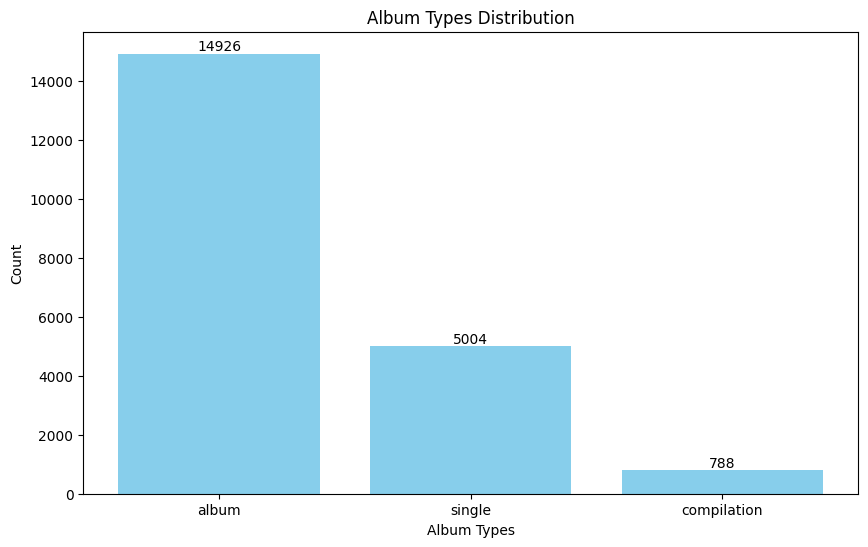

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/dataset/Spotify_Youtube.csv')

album_type_count = df['Album_type'].value_counts()

labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()

plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color='skyblue')
plt.xlabel('Album Types')
plt.ylabel('Count')
plt.title('Album Types Distribution')

for i, value in enumerate(sizes):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


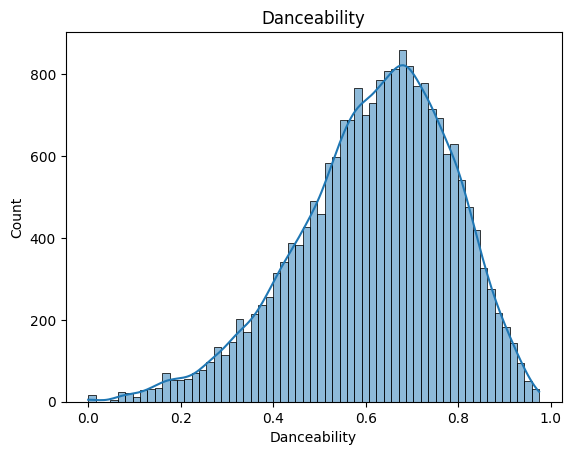

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


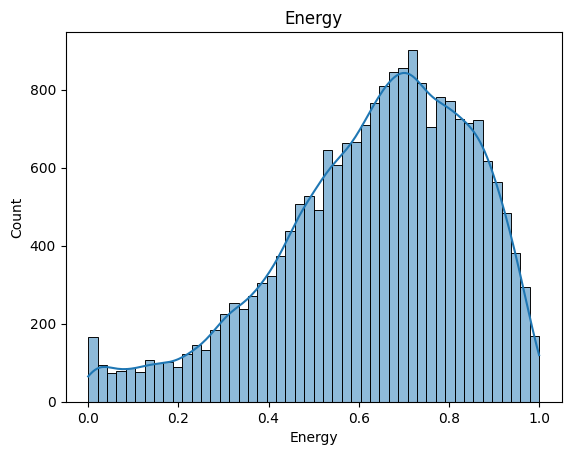

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


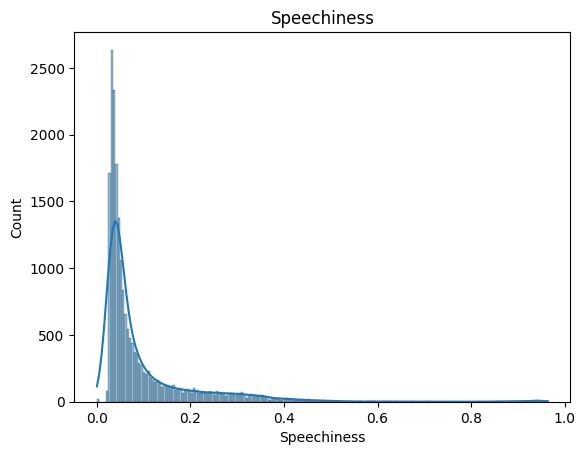

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


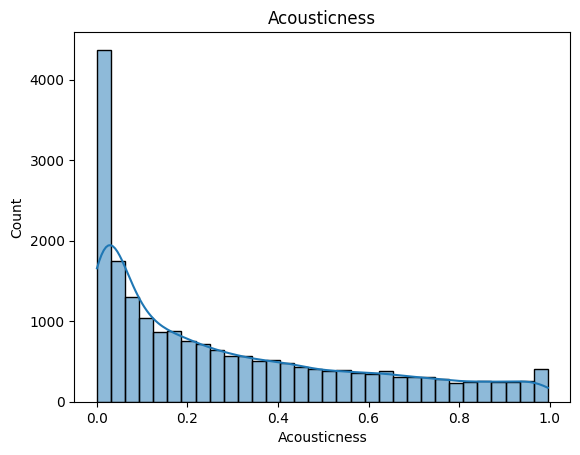

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


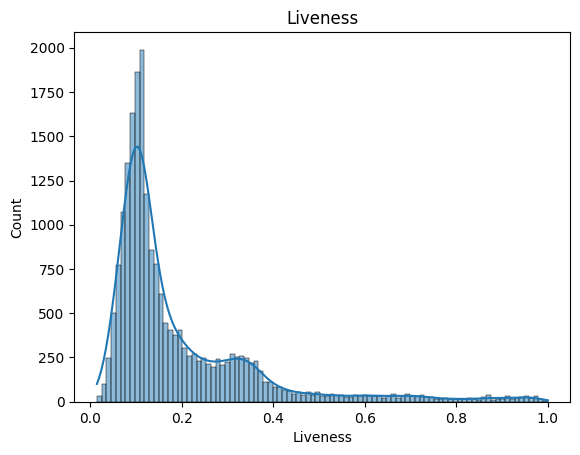

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


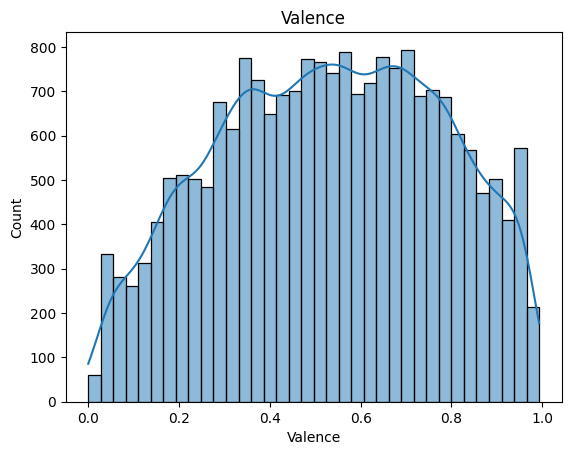

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


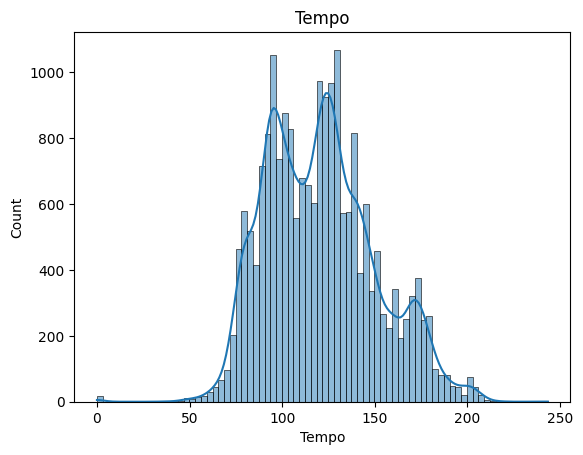

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


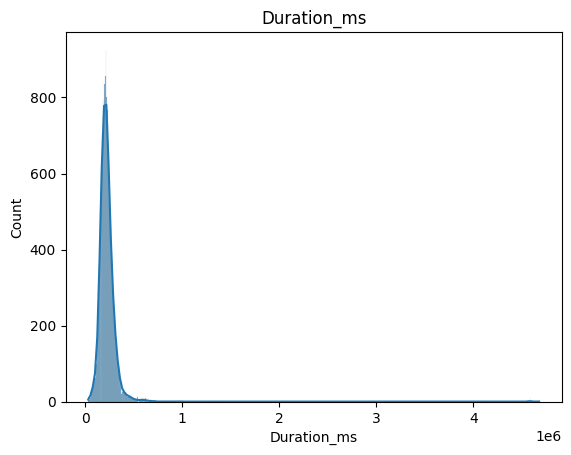

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/dataset/Spotify_Youtube.csv')

numerical_columns = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']

for column in numerical_columns:
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.show()

In [14]:
artist_grouped = df.groupby('Artist')[['Views', 'Stream']].sum()
artist_sorted = artist_grouped.sort_values(['Views', 'Stream'], ascending=False)
top_10 = artist_sorted.head(10)

top_10

,Views,Stream
Artist,,
Ed Sheeran,1.546021e+10,1.439488e+10
CoComelon,1.460167e+10,3.690822e+08
Katy Perry,1.312063e+10,6.607329e+09
Charlie Puth,1.216759e+10,7.041187e+09
Luis Fonsi,1.162811e+10,5.054326e+09
Justin Bieber,1.099106e+10,1.209777e+10
Daddy Yankee,1.087193e+10,5.135462e+09
Bruno Mars,1.024092e+10,1.089786e+10
Macklemore & Ryan Lewis,1.012206e+10,3.982978e+09


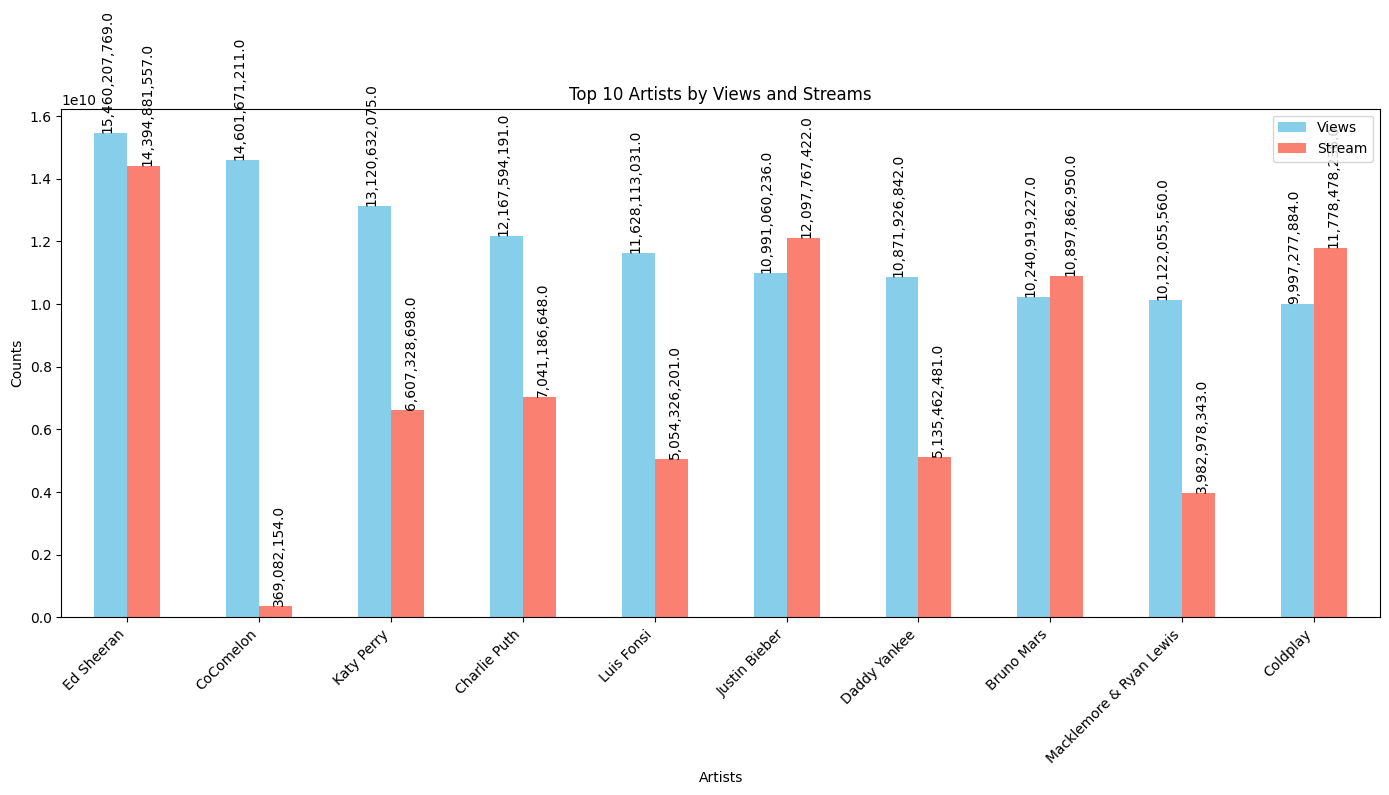

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/dataset/Spotify_Youtube.csv')

artist_grouped = df.groupby('Artist')[['Views', 'Stream']].sum()
artist_sorted = artist_grouped.sort_values(['Views', 'Stream'], ascending=False)
top_10 = artist_sorted.head(10)

plt.figure(figsize=(14, 8))
ax = top_10[['Views', 'Stream']].plot(kind='bar', ax=plt.gca(), color=['skyblue', 'salmon'])

plt.title('Top 10 Artists by Views and Streams')
plt.xlabel('Artists')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(['Views', 'Stream'], loc='upper right')

for idx, (artist, row) in enumerate(top_10.iterrows()):
    ax.text(idx - 0.15, row['Views'] + 10**6, f'{row["Views"]:,}', ha='center', va='bottom', rotation=90)
    ax.text(idx + 0.15, row['Stream'] + 10**6, f'{row["Stream"]:,}', ha='center', va='bottom', rotation=90)

plt.xticks(ticks=range(len(top_10)), labels=top_10.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


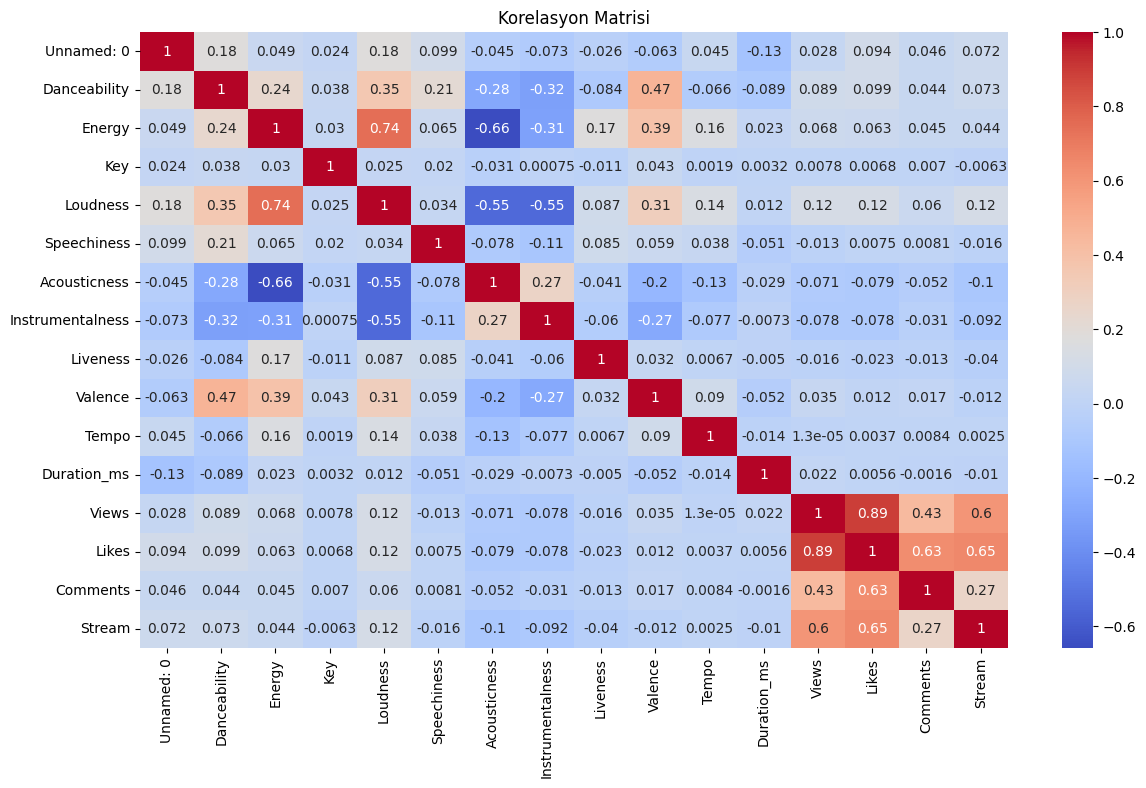

In [16]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(14, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

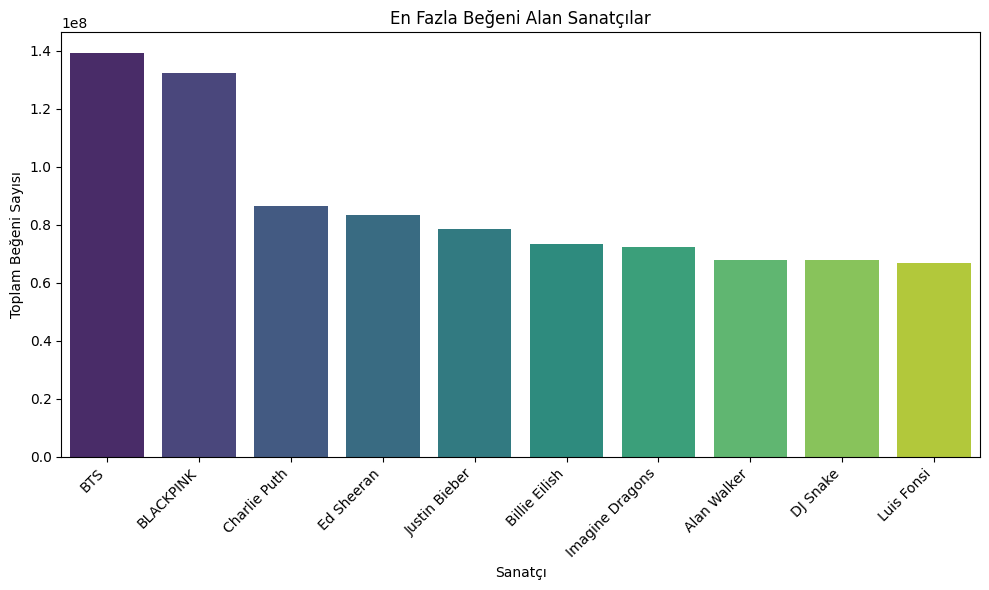

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

top_artists = df.groupby('Artist')['Likes'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')
plt.title('En Fazla Beğeni Alan Sanatçılar')
plt.xlabel('Sanatçı')
plt.ylabel('Toplam Beğeni Sayısı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

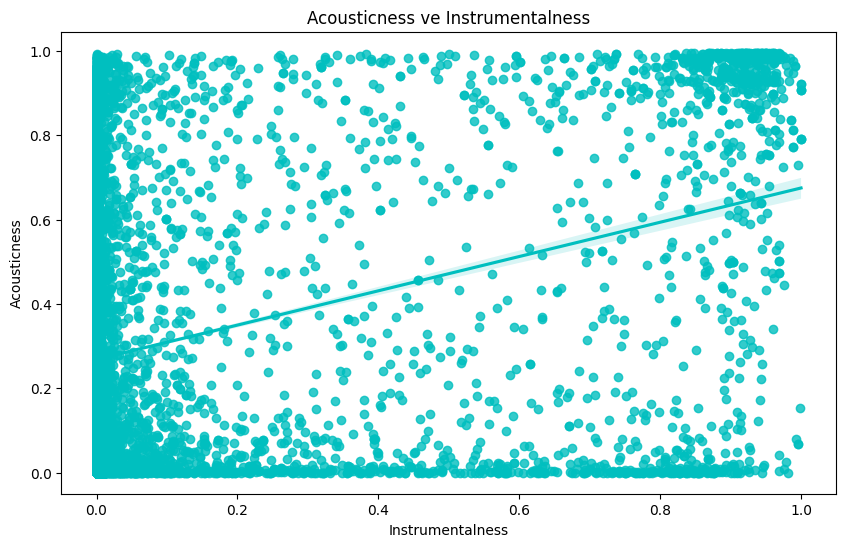

In [18]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, y="Acousticness", x="Instrumentalness", color="c")
plt.title("Acousticness ve Instrumentalness")
plt.show()

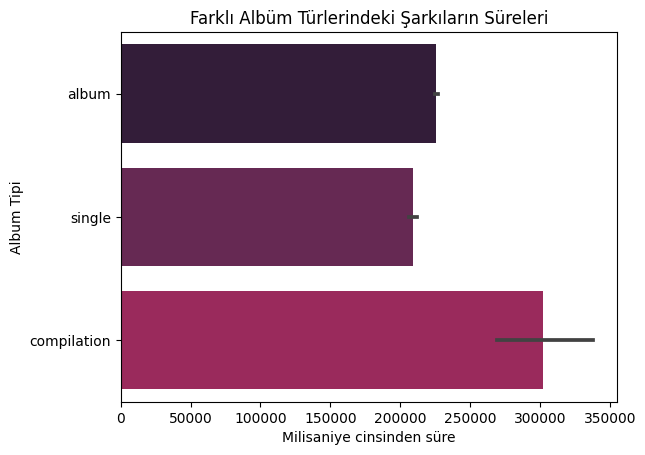

In [19]:
plt.title("Farklı Albüm Türlerindeki Şarkıların Süreleri")
palette = sns.color_palette("rocket")
sns.barplot(y='Album_type', x='Duration_ms', data=df, palette=palette)
plt.xlabel("Milisaniye cinsinden süre")
plt.ylabel("Album Tipi")
plt.show()

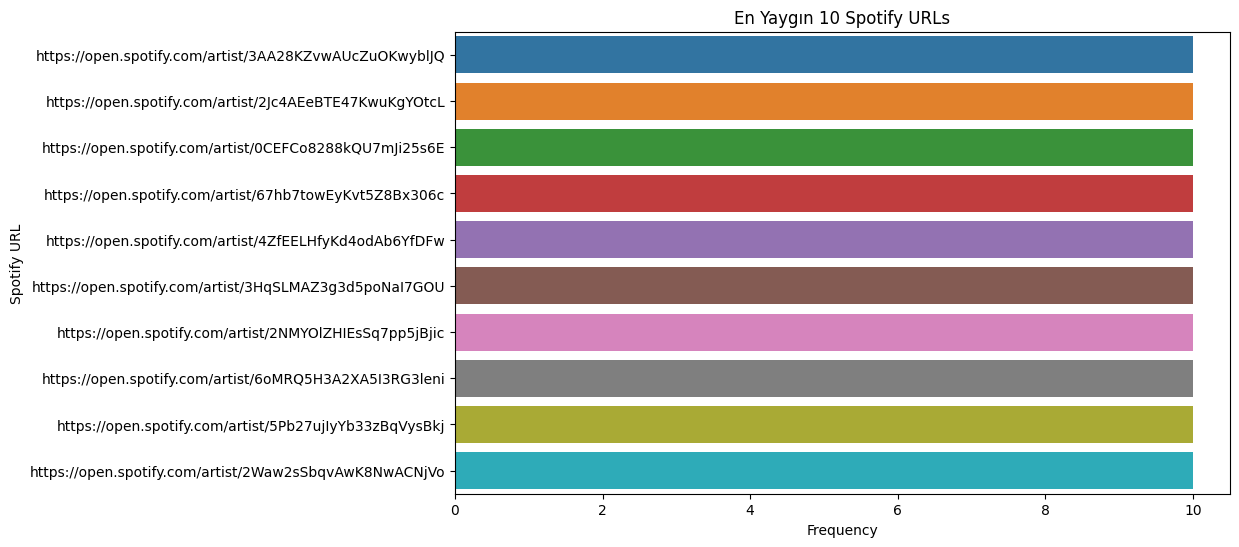

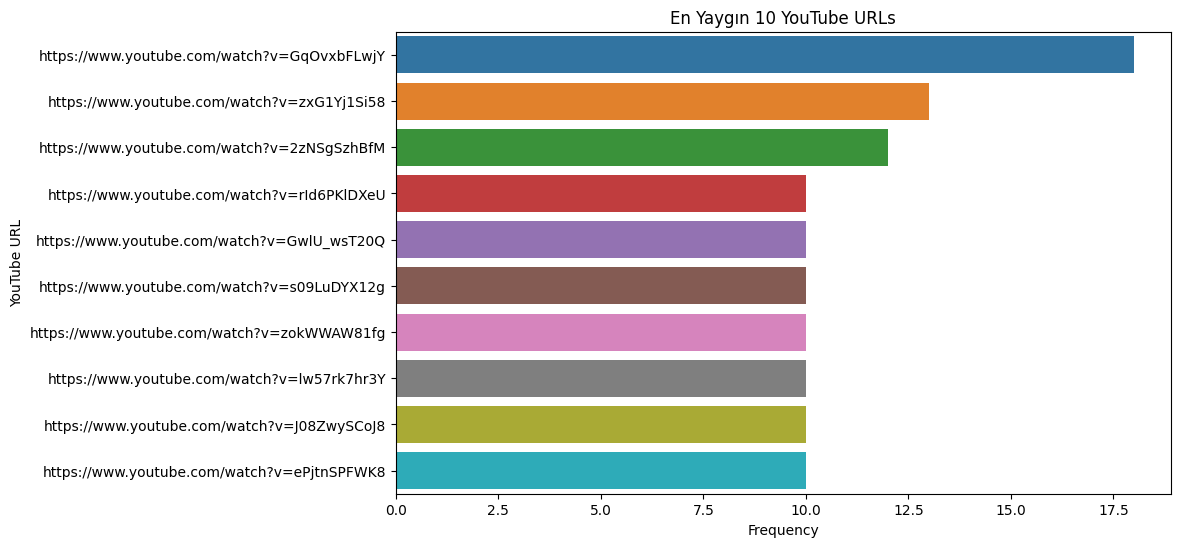

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Url_spotify', data=df, order=df['Url_spotify'].value_counts().index[:10])
plt.title('En Yaygın 10 Spotify URLs')
plt.xlabel('Frequency')
plt.ylabel('Spotify URL')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='Url_youtube', data=df, order=df['Url_youtube'].value_counts().index[:10])
plt.title('En Yaygın 10 YouTube URLs')
plt.xlabel('Frequency')
plt.ylabel('YouTube URL')
plt.show()

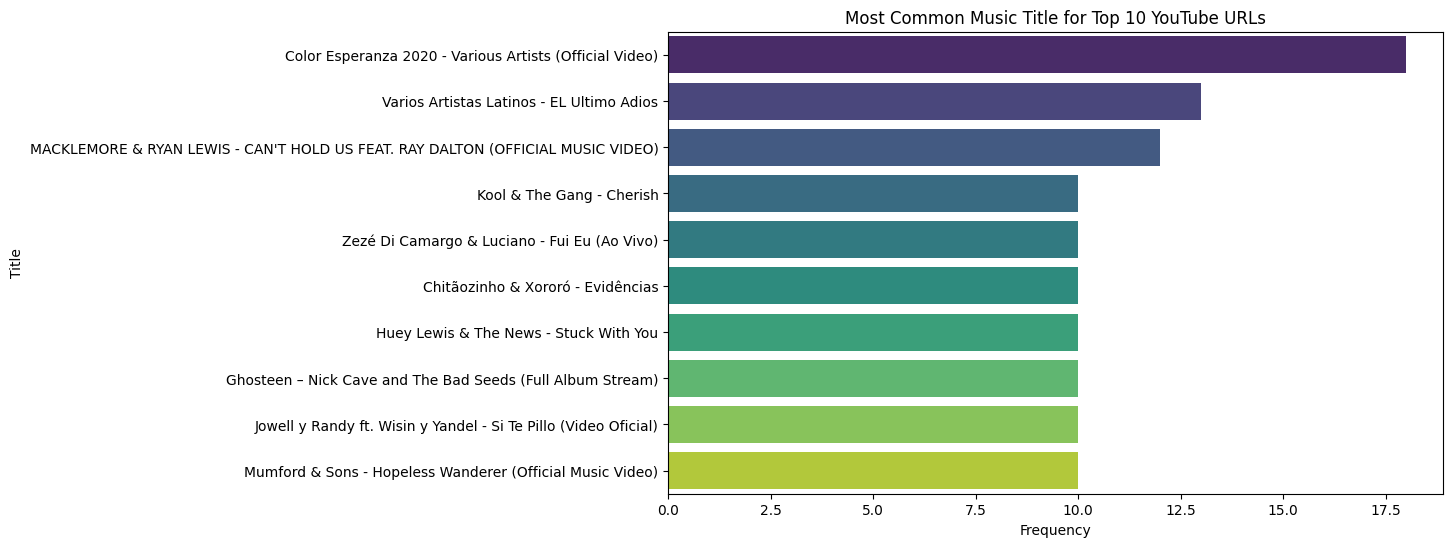

In [21]:
top_youtube_urls = df['Url_youtube'].value_counts().index[:10]
youtube_title_counts = df[df['Url_youtube'].isin(top_youtube_urls)]['Title'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=youtube_title_counts.index, x=youtube_title_counts.values, palette='viridis')
plt.title('Most Common Music Title for Top 10 YouTube URLs')
plt.xlabel('Frequency')
plt.ylabel('Title')
plt.show()

In [22]:
top_songs = df.sort_values('Stream', ascending=False).head(10)
top_songs[['Track', 'Valence', 'Loudness', 'Acousticness']]

,Track,Valence,Loudness,Acousticness
15250,Blinding Lights,0.334,-5.934,0.00146
12452,Shape of You,0.931,-3.183,0.58100
19186,Someone You Loved,0.446,-5.679,0.75100
17937,rockstar (feat. 21 Savage),0.129,-6.136,0.12400
17445,Sunflower - Spider-Man: Into the Spider-Verse,0.925,-4.368,0.53300
17938,Sunflower - Spider-Man: Into the Spider-Verse,0.925,-4.368,0.53300
13503,One Dance,0.370,-5.609,0.00776
16099,Closer,0.661,-5.599,0.41400
16028,Closer,0.661,-5.599,0.41400
14030,Believer,0.666,-4.374,0.06220


In [23]:
dup_row = df[df['Track'] == 'Someone You Loved']
dup_row

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
19186,19186,Lewis Capaldi,https://open.spotify.com/artist/4GNC7GD6oZMSxP...,Someone You Loved,Divinely Uninspired To A Hellish Extent,album,spotify:track:7qEHsqek33rTcFNT9PFqLf,0.501,0.405,1.0,...,https://www.youtube.com/watch?v=zABLecsR5UE,Lewis Capaldi - Someone You Loved,LewisCapaldiVEVO,586768373.0,7367091.0,147565.0,Listen to my new single ‘Pointless’ here!\nhtt...,True,True,2.634013e+09


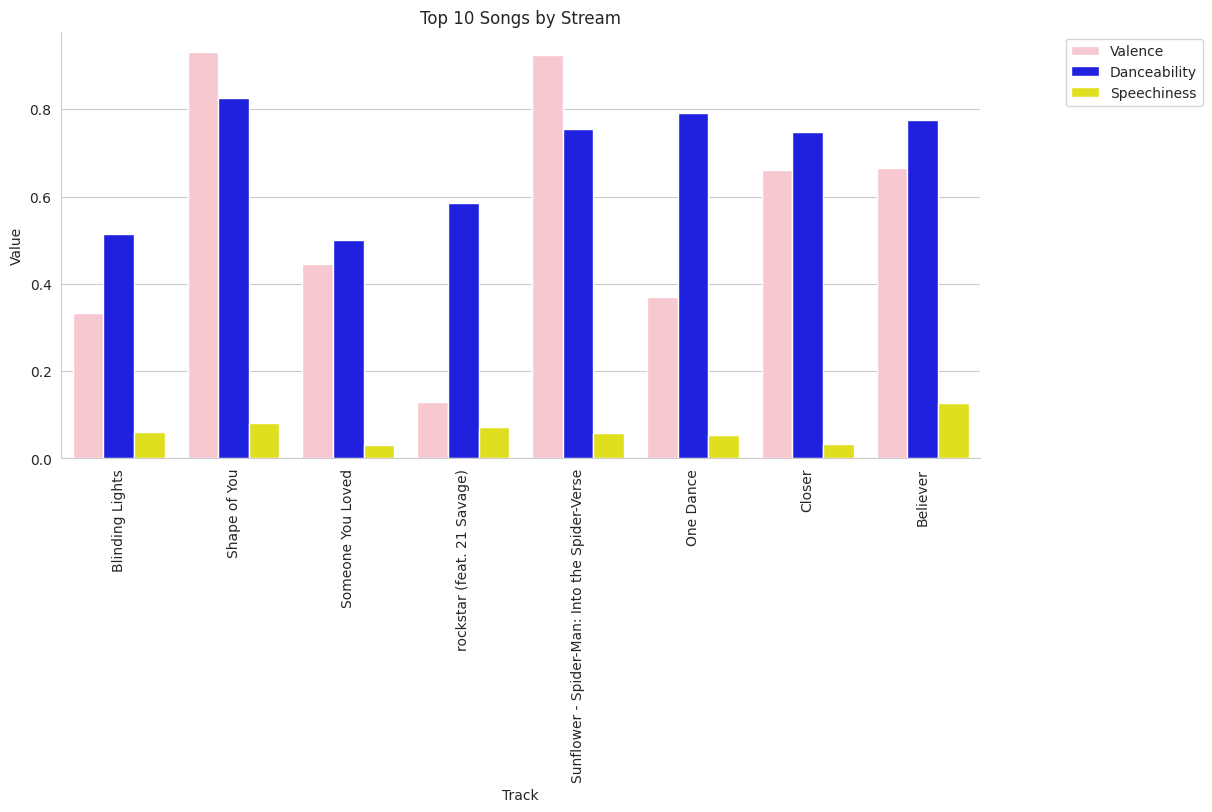

In [24]:
top_songs_melt = top_songs.melt(id_vars=['Track'], value_vars=['Valence', 'Danceability', 'Speechiness'],
                                var_name='Attribute', value_name='Value')

sns.set_style('whitegrid')
sns.catplot(x='Track', y='Value', hue='Attribute', data=top_songs_melt, kind='bar',
            palette={'Valence': 'pink', 'Danceability': 'blue', 'Speechiness': 'yellow'},
            aspect=2, legend=False)


plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Top 10 Songs by Stream')
plt.xlabel('Track')
plt.ylabel('Value')

plt.xticks(rotation=90)
plt.show()